<a href="https://colab.research.google.com/github/Vasco2510/CA2_PriceCalculator/blob/main/abel_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Data Preprocessing
- Data is cleaned and preprocesed to handle missing values.
- Categorical variables such as Traffic Status, Logistics_Delay_Reason, Assets_ID are converted into numeric values using one-hot encoding.

## STEP 2: Exploratory Data Analysis (EDA)
- Traffic Condition Analysis: The distribution of shipments across different traffic statuses is examined.
- Waiting Time vs. Traffic: The relationship between waiting time and traffic congestion is visualized.
Correlation Analysis: A heatmap is generated to identify which features have the highest impact on logistics delays.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("smart_logistics_dataset.csv")
df.head(100)

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
0,2024-03-20 00:11:14,Truck_7,-65.7383,11.2497,390,Delayed,27.0,67.8,Detour,38,320,4,NaN,60.1,285,1
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
2,2024-07-29 18:42:48,Truck_10,54.9232,79.5455,190,In Transit,25.2,62.2,Detour,34,355,3,NaN,99.2,260,0
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
4,2024-09-27 15:52:58,Truck_7,-65.8477,47.9468,480,Delayed,20.5,57.2,Clear,56,197,6,NaN,71.6,270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-09-27 18:08:16,Truck_4,-11.2424,-4.5638,203,Delivered,20.4,78.3,Detour,21,187,5,NaN,87.9,262,0
96,2024-11-17 08:35:02,Truck_6,62.6559,18.8474,297,Delayed,23.1,59.4,Detour,29,268,10,Traffic,71.2,151,1
97,2024-05-03 03:34:28,Truck_9,60.8032,-179.5906,238,In Transit,25.0,75.8,Heavy,26,330,9,Weather,99.2,165,1
98,2024-03-05 00:54:47,Truck_4,-10.0451,79.8956,126,Delivered,28.2,54.5,Detour,35,320,4,Mechanical Failure,93.7,136,0


 tiempo de entrega = waiting time.
 Costo de envio = User_Transaction_Amount    o    10%*(User_Transaction_Amount)   o  User_Transaction

In [ ]:
## df.info
data_info = pd.DataFrame({
    'Columna': df.columns,
    'Valores no Nulos': df.count(),
    'Tipo de Dato': df.dtypes
}).reset_index(drop=True)
data_info


,Columna,Valores no Nulos,Tipo de Dato
0,Timestamp,1000,object
1,Asset_ID,1000,object
2,Latitude,1000,float64
3,Longitude,1000,float64
4,Inventory_Level,1000,int64
5,Shipment_Status,1000,object
6,Temperature,1000,float64
7,Humidity,1000,float64
8,Traffic_Status,1000,object
9,Waiting_Time,1000,int64


Conteo categórico (Cuantos diferentes valores tenemos en una columna)

In [ ]:
## Todos estuvieron
df.describe(include='all').T
df.isna().sum()


Timestamp                    0
Asset_ID                     0
Latitude                     0
Longitude                    0
Inventory_Level              0
Shipment_Status              0
Temperature                  0
Humidity                     0
Traffic_Status               0
Waiting_Time                 0
User_Transaction_Amount      0
User_Purchase_Frequency      0
Logistics_Delay_Reason     263
Asset_Utilization            0
Demand_Forecast              0
Logistics_Delay              0
dtype: int64

A partir de lo anterior, vemos que tenemos 263 NaN valores en solo "Asset_utilization"

In [ ]:
# Conteos categóricos
# Para ver cuantos valores diferentes tenemos en las columnas categoricas
conteos_categoricos = []
columnas = df.select_dtypes(include='object').columns.drop("Timestamp")

for col in columnas:
    conteos = df[col].value_counts()  # conteo de cada categoría
    conteos_categoricos.append({
        'Columna': col,
        'Valores diferentes': df[col].nunique(),
        'Conteos': conteos.to_dict()   # lo guardamos como diccionario
    })

conteos_categoricos = pd.DataFrame(conteos_categoricos)
print(conteos_categoricos)


                  Columna  Valores diferentes  \
0                Asset_ID                  10   
1         Shipment_Status                   3   
2          Traffic_Status                   3   
3  Logistics_Delay_Reason                   3   

                                             Conteos  
0  {'Truck_8': 109, 'Truck_4': 107, 'Truck_2': 10...  
1  {'Delayed': 350, 'Delivered': 338, 'In Transit...  
2        {'Detour': 345, 'Clear': 328, 'Heavy': 327}  
3  {'Weather': 267, 'Traffic': 236, 'Mechanical F...  


In [ ]:
df["Traffic_Status"].value_counts()
df["Logistics_Delay_Reason"].value_counts()

Logistics_Delay_Reason
Weather               267
No Delay Reason       263
Traffic               236
Mechanical Failure    234
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlacion entre columnas')

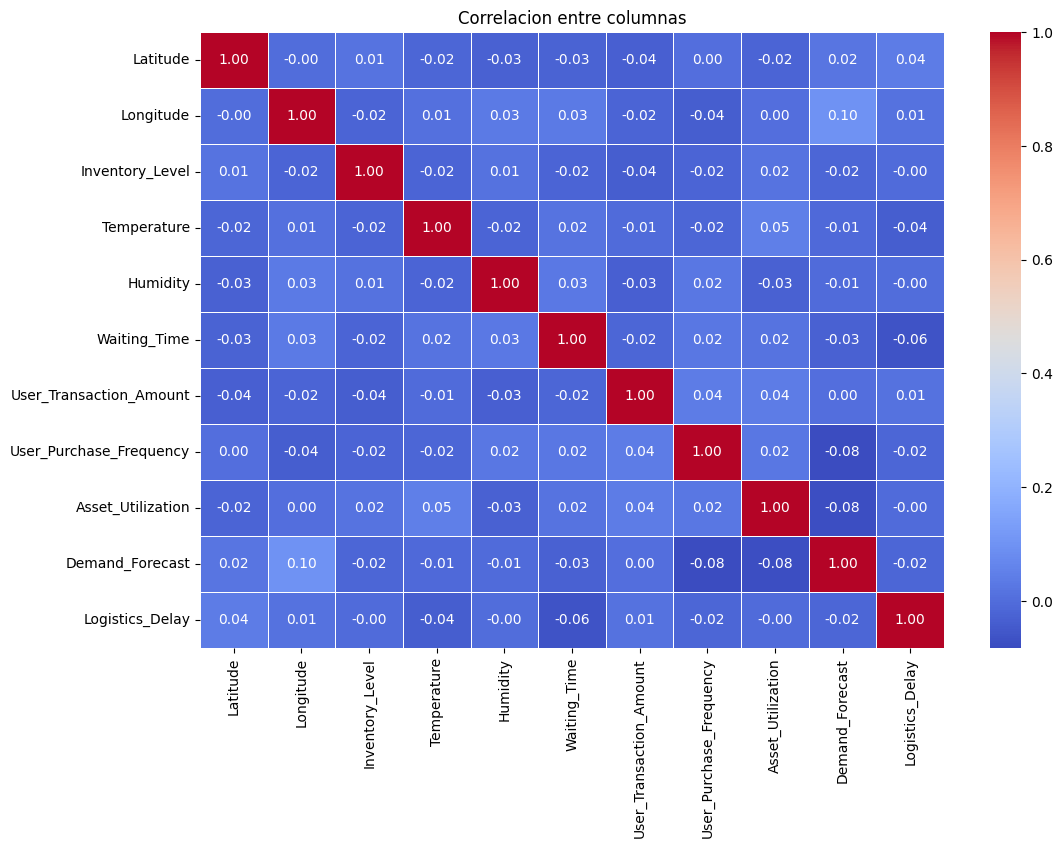

In [ ]:
df_encoded= df.copy()
df_numeric= df.select_dtypes(include=['number'])

## Compute a correlation matrix
corr_matrix =df_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlacion entre columnas")

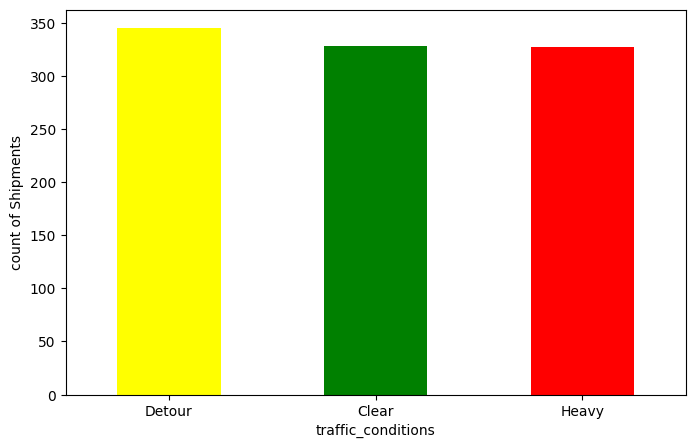

In [ ]:
## shipments vs traffic distribution  analysis
traffic_distribution= df["Traffic_Status"].value_counts()

plt.figure(figsize=(8,5))
traffic_distribution.plot(kind="bar", color=["yellow", "green", "red"])
plt.xlabel("traffic_conditions")
plt.ylabel("count of Shipments")
plt.xticks(rotation=0)
plt.show()


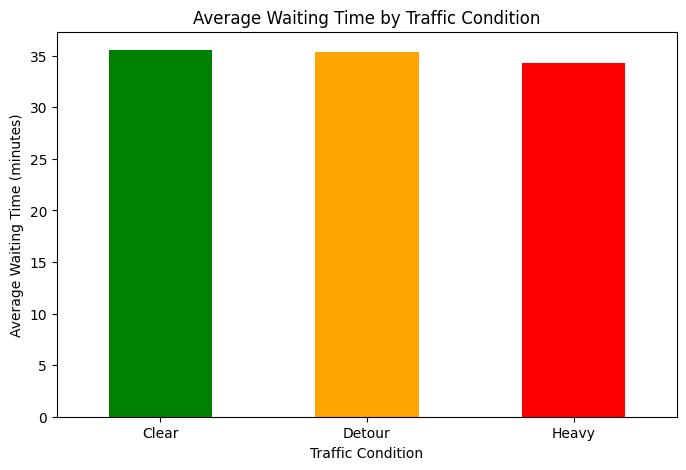

In [ ]:
# Analyze the average waiting time in different traffic conditions
traffic_waiting_time = df.groupby("Traffic_Status")["Waiting_Time"].mean()

# Visualize waiting time in different traffic conditions
plt.figure(figsize=(8, 5))
traffic_waiting_time.plot(kind="bar", color=["green", "orange", "red"])
plt.xlabel("Traffic Condition")
plt.ylabel("Average Waiting Time (minutes)")
plt.title("Average Waiting Time by Traffic Condition")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Correlation between traffic status and logistics delay
df_encoded["Traffic_Status_Encoded"] = df["Traffic_Status"].map({"Clear": 0, "Detour": 1, "Heavy": 2})
traffic_delay_corr = df_encoded[["Traffic_Status_Encoded", "Logistics_Delay"]].corr().iloc[0, 1]

traffic_distribution, traffic_waiting_time, traffic_delay_corr

(Traffic_Status
 Detour    345
 Clear     328
 Heavy     327
 Name: count, dtype: int64,
 Traffic_Status
 Clear     35.542683
 Detour    35.307246
 Heavy     34.321101
 Name: Waiting_Time, dtype: float64,
 np.float64(0.52993231256055))

### Preparacion de la data
- Realizaremos conversion de tipos para algunas columnas que lo requieran
- Crearemos nuevas columnas de información clave.
- Considearemos que en la columna "Logistics_delay_reason" un valor faltante significa que no hubo alguna razón de demora "No Delay Reason". Este es un supuesto sobre el cual nos apoyaremos.

A continuacion, comenzaremos con procesar la columna "Timestamp" y convertirla en un horas "hour" y "day_of_week".


In [ ]:
df['Logistics_Delay_Reason'] = df['Logistics_Delay_Reason'].fillna('No Delay Reason')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df.drop('Timestamp', axis=1, inplace=True) # Eliminar la columna original

In [ ]:
# 3. Aplicar One-Hot Encoding a las variables categóricas
categorical_features = ['Asset_ID', 'Shipment_Status', 'Traffic_Status', 'Logistics_Delay_Reason']

# Usa pd.get_dummies para realizar One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()


# El código de pd.get_dummies(df, ..., drop_first=True) maneja automáticamente la creación de estas nuevas columnas, eliminando la primera categoría de cada variable para evitar la multicolinealidad

,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Asset_Utilization,Demand_Forecast,...,Asset_ID_Truck_7,Asset_ID_Truck_8,Asset_ID_Truck_9,Shipment_Status_Delivered,Shipment_Status_In Transit,Traffic_Status_Detour,Traffic_Status_Heavy,Logistics_Delay_Reason_No Delay Reason,Logistics_Delay_Reason_Traffic,Logistics_Delay_Reason_Weather
0,-65.7383,11.2497,390,27.0,67.8,38,320,4,60.1,285,...,True,False,False,False,False,True,False,True,False,False
1,22.2748,-131.7086,491,22.5,54.3,16,439,7,80.9,174,...,False,False,False,False,True,False,True,False,False,True
2,54.9232,79.5455,190,25.2,62.2,34,355,3,99.2,260,...,False,False,False,False,True,True,False,True,False,False
3,42.3900,-1.4788,330,25.4,52.3,37,227,5,97.4,160,...,False,False,True,True,False,False,True,False,True,False
4,-65.8477,47.9468,480,20.5,57.2,56,197,6,71.6,270,...,True,False,False,False,False,False,False,True,False,False


### Implementamos modelo sin normalizar variables
En este caso, el modelo buscará predecir si el envio sufrirá un delay o no. Este es un problema de clasficación (Supervised learning)


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


y=df["Logistics_Delay"]
x=df.drop("Logistics_Delay",axis=1)

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

print("Test Size", x_test.shape, y_test.shape)
print("Train Size", x_train.shape,y_train.shape)

# Modelo 1: Regresión Logística
print("--- Modelo de Regresión Logística (Sin Normalización) ---")
log_reg = LogisticRegression(random_state=42, solver='liblinear')
# Se usa 'liblinear' porque es un buen optimizador para conjuntos de datos pequeños
# y es robusto ante datos no escalados.
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
print(classification_report(y_test, y_pred_log_reg))



Test Size (200, 28) (200,)
Train Size (800, 28) (800,)
--- Modelo de Regresión Logística (Sin Normalización) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
df["Logistics_Delay"].head()

0    1
1    1
2    0
3    1
4    1
Name: Logistics_Delay, dtype: int64

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

### Implementamos modelo normalizando variables


In [ ]:
from sklearn.preprocessing import StandardScaler

# Columnas a normalizar
features_to_scale = ['Temperature', 'Humidity', 'Asset_Utilization', 'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Demand_Forecast']

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])

# Transformar los datos de prueba usando el mismo scaler
x_test[features_to_scale] = scaler.transform(x_test[features_to_scale])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                1000 non-null   float64
 1   Longitude                               1000 non-null   float64
 2   Inventory_Level                         1000 non-null   int64  
 3   Temperature                             1000 non-null   float64
 4   Humidity                                1000 non-null   float64
 5   Waiting_Time                            1000 non-null   int64  
 6   User_Transaction_Amount                 1000 non-null   int64  
 7   User_Purchase_Frequency                 1000 non-null   int64  
 8   Asset_Utilization                       1000 non-null   float64
 9   Demand_Forecast                         1000 non-null   int64  
 10  Logistics_Delay                         1000 non-null   int64

In [ ]:
y = df['Concretecompressivestrength']
x = df.drop('Concretecompressivestrength', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Train size :", x_train.shape, y_train.shape)
print("Test size  :", x_test.shape, y_test.shape)

Analizaremos los valores de columnas claves para observar si los podemos comvertir a números, los cuales son más facilmente procesables.

# Pruebas
Probaremos identificar relaciones entre distintas variables.

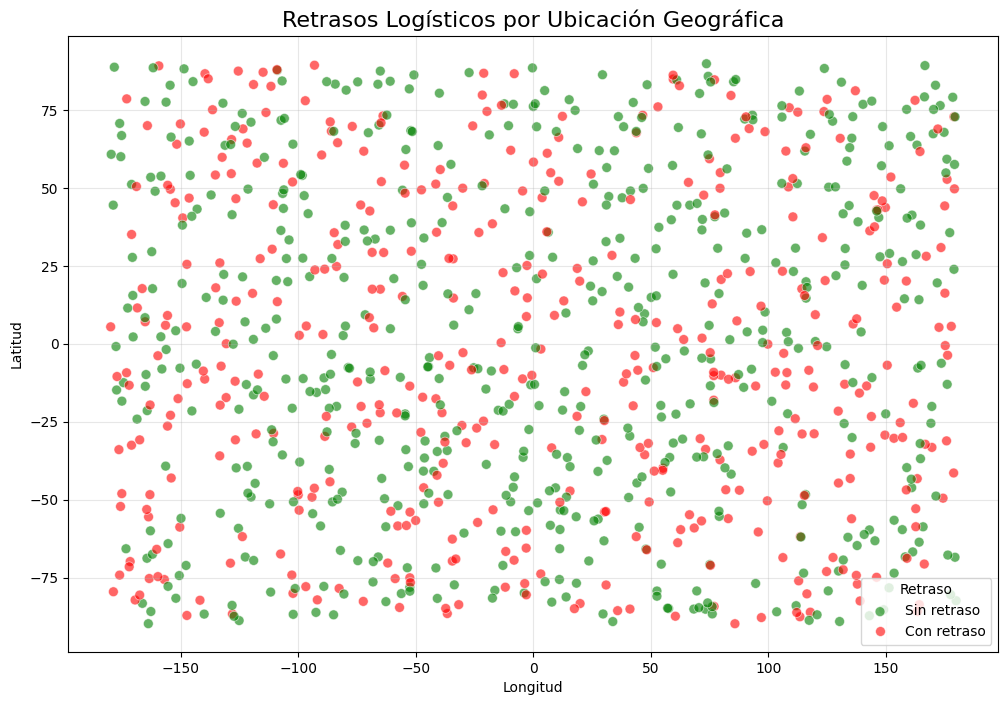

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df_logistics = pd.read_csv('smart_logistics_dataset.csv')

# Crear el scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_logistics,
    x='Longitude',
    y='Latitude',
    hue='Logistics_Delay',
    palette={0: 'red', 1: 'green'},
    alpha=0.6,
    s=50
)

plt.title('Retrasos Logísticos por Ubicación Geográfica', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Retraso', labels=['Sin retraso', 'Con retraso'])
plt.grid(alpha=0.3)
plt.show()

In [6]:
import plotly.express as px
## Hemos ya verificado que el mapa que se obtiene, es el adecuado.

fig = px.scatter_geo(
    df_logistics,
    lat='Latitude',
    lon='Longitude',
    color='Logistics_Delay',
    color_discrete_map={0: 'green', 1: 'red'},
    title='Retrasos Logísticos en Mapa Global',
    hover_data=['Asset_ID', 'Shipment_Status', 'Logistics_Delay_Reason']
)
fig.show()

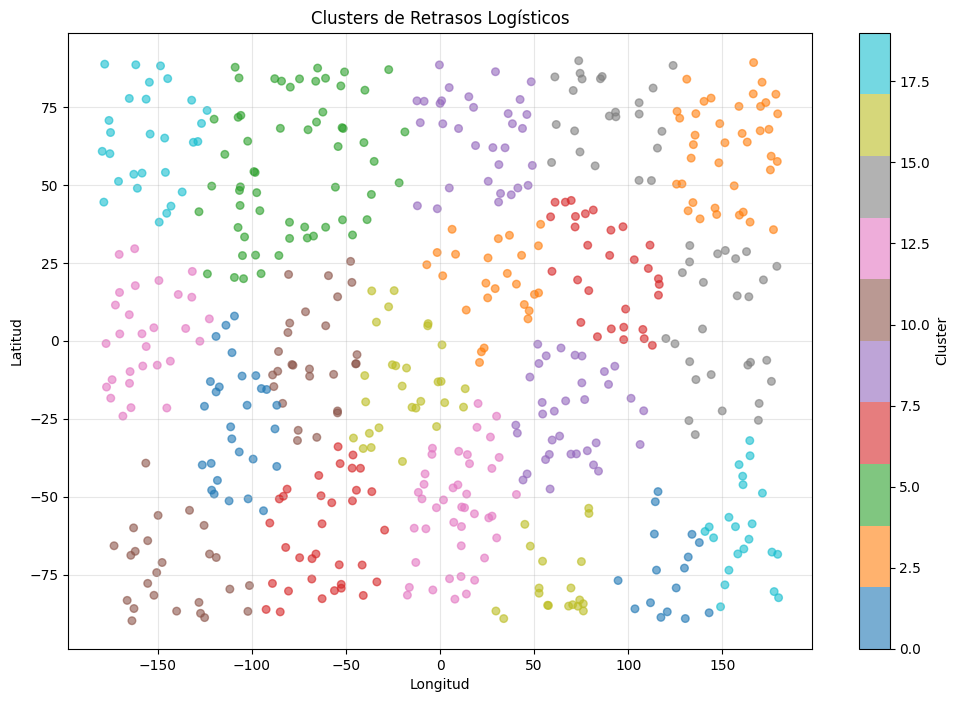

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Filtrar solo retrasos (Logistics_Delay == 1)
delay_df = df_logistics[df_logistics['Logistics_Delay'] == 1][['Latitude', 'Longitude']]

# Aplicar K-Means (ej: 5 clusters)
kmeans = KMeans(n_clusters=20, random_state=42)
delay_df['Cluster'] = kmeans.fit_predict(delay_df[['Latitude', 'Longitude']])

# Visualizar clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(delay_df['Longitude'], delay_df['Latitude'], c=delay_df['Cluster'], cmap='tab10', s=30, alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters de Retrasos Logísticos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(alpha=0.3)
plt.show()

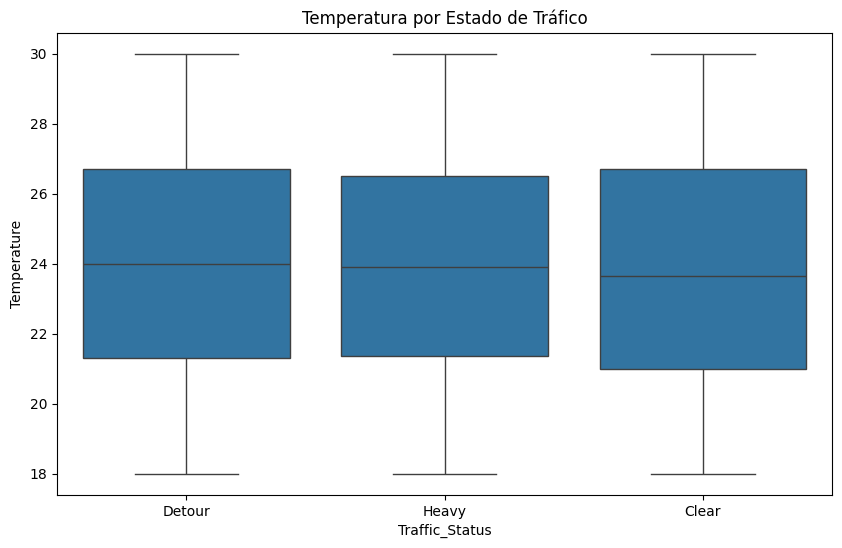

In [12]:
# Boxplot de Temperatura por Estado de Tráfico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_logistics, x='Traffic_Status', y='Temperature')
plt.title('Temperatura por Estado de Tráfico')
plt.show()

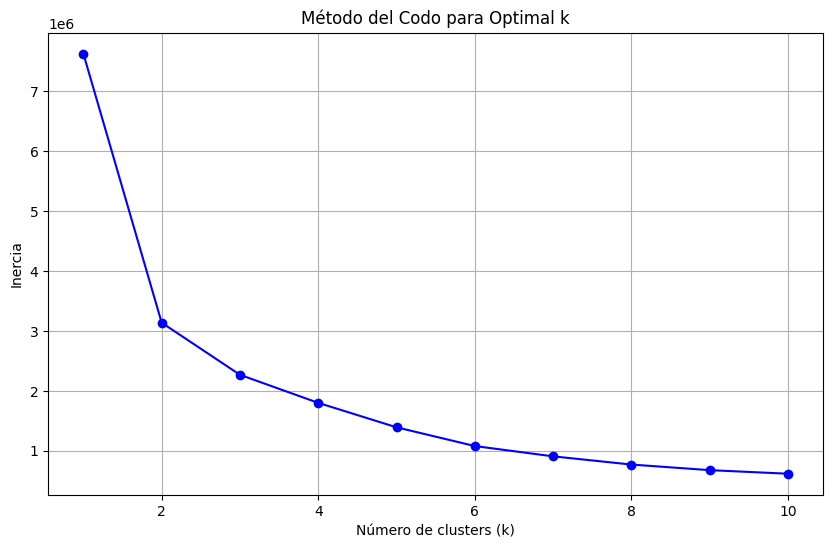

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filtrar solo retrasos
delay_df = df_logistics[df_logistics['Logistics_Delay'] == 1][['Latitude', 'Longitude']]

# Calcular inercia para diferentes valores de k
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(delay_df)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Optimal k')
plt.grid(True)
plt.show()


Probabilidad de que dado un retraso, sea de cada truck:
Asset_ID
Truck_10    12.01
Truck_4     11.13
Truck_8     10.95
Truck_7     10.60
Truck_3     10.25
Truck_2      9.89
Truck_6      9.54
Truck_9      9.36
Truck_5      8.13
Truck_1      8.13
Name: count, dtype: float64


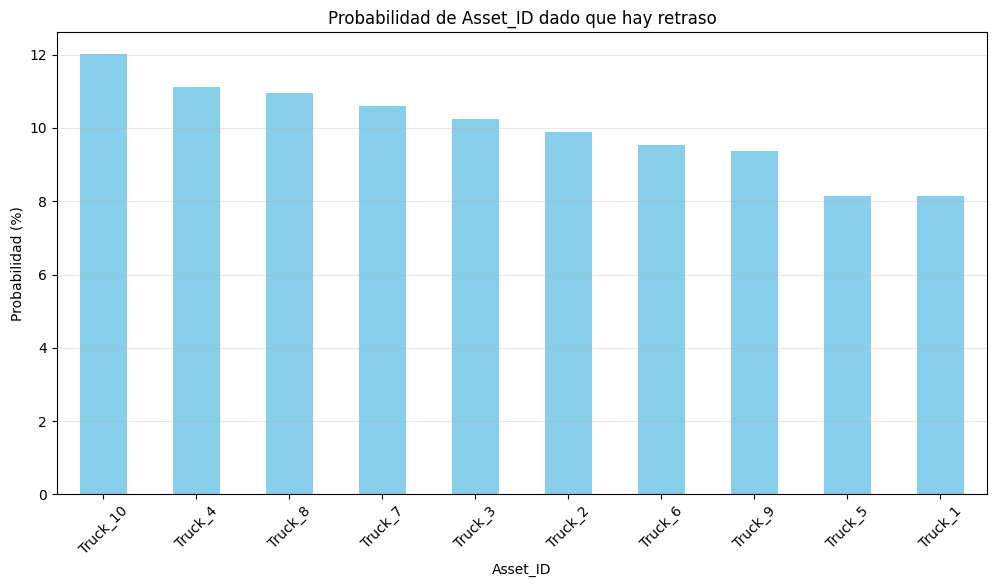

In [16]:
# Calcular probabilidades condicionales P(Asset_ID | Delay)
delay_count_by_truck = df_logistics[df_logistics['Logistics_Delay'] == 1]['Asset_ID'].value_counts()
total_delays = len(df_logistics[df_logistics['Logistics_Delay'] == 1])

probabilities = (delay_count_by_truck / total_delays * 100).round(2)

print("Probabilidad de que dado un retraso, sea de cada truck:")
print(probabilities)

# Gráfico de barras
plt.figure(figsize=(12, 6))
probabilities.plot(kind='bar', color='skyblue')
plt.title('Probabilidad de Asset_ID dado que hay retraso')
plt.xlabel('Asset_ID')
plt.ylabel('Probabilidad (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [22]:
## proabilida de retraso por temperatura
### Conclusion: Parece no haber impacto en si habrá delay o no

# Definir umbrales (puedes ajustarlos)
temp_threshold = df_logistics['Temperature'].median()
humidity_threshold = df_logistics['Humidity'].median()

print(f"Umbral temperatura: {temp_threshold:.1f}°C")
print(f"Umbral humedad: {humidity_threshold:.1f}%")

# Probabilidad de temperatura alta dado retraso
high_temp_delays = len(df_logistics[(df_logistics['Logistics_Delay'] == 1) & (df_logistics['Temperature'] > temp_threshold)])
total_delays = len(df_logistics[df_logistics['Logistics_Delay'] == 1])

p_high_temp_given_delay = round(high_temp_delays / total_delays * 100,2)
p_low_temp_given_delay = 100 - p_high_temp_given_delay

# Probabilidad de humedad alta dado retraso
high_humidity_delays = len(df_logistics[(df_logistics['Logistics_Delay'] == 1) & (df_logistics['Humidity'] > humidity_threshold)])
p_high_humidity_given_delay = round(high_humidity_delays / total_delays * 100,2)
p_low_humidity_given_delay = 100 - p_high_humidity_given_delay

print(f"\nDado que hay retraso:")
print(f"Probabilidad de temperatura alta (> {temp_threshold}°C): {p_high_temp_given_delay}%")
print(f"Probabilidad de temperatura baja: {p_low_temp_given_delay}%")
print(f"Probabilidad de humedad alta (> {humidity_threshold}%): {p_high_humidity_given_delay}%")
print(f"Probabilidad de humedad baja: {p_low_humidity_given_delay}%")

Umbral temperatura: 23.8°C
Umbral humedad: 65.2%

Dado que hay retraso:
Probabilidad de temperatura alta (> 23.8°C): 48.94%
Probabilidad de temperatura baja: 51.06%
Probabilidad de humedad alta (> 65.2%): 50.18%
Probabilidad de humedad baja: 49.82%


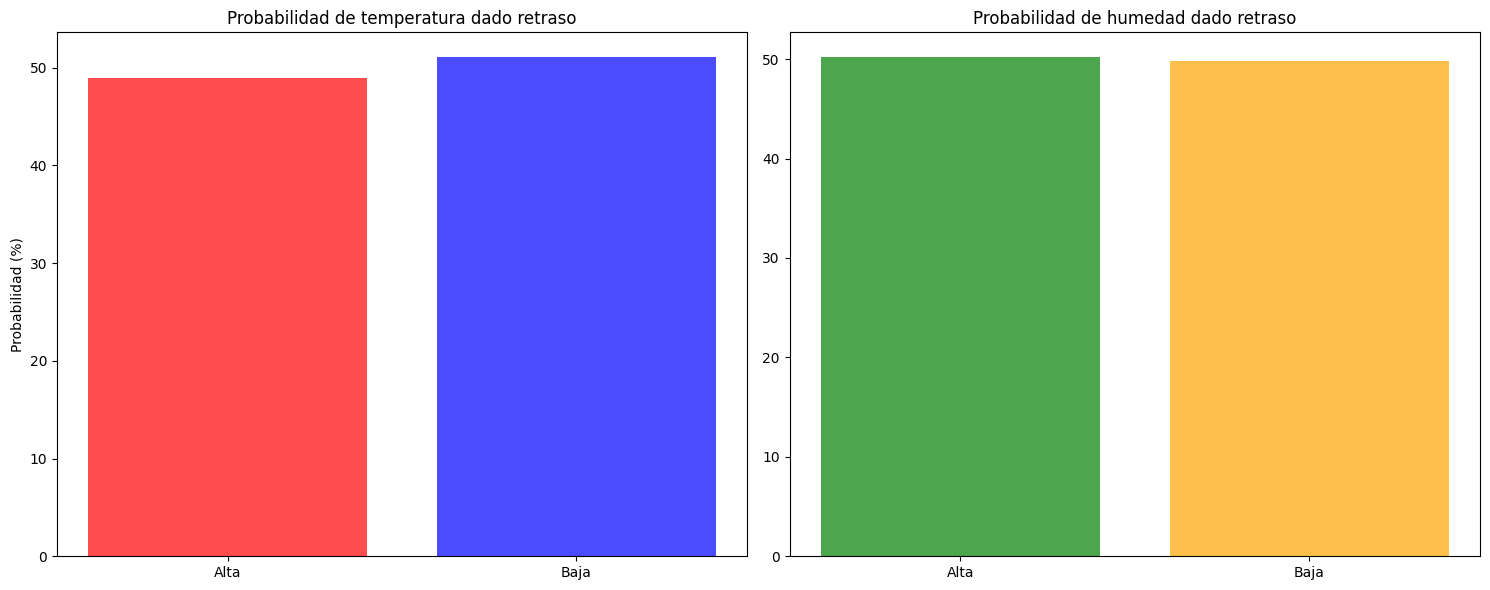

In [23]:
# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Temperatura
ax1.bar(['Alta', 'Baja'], [p_high_temp_given_delay, p_low_temp_given_delay],
        color=['red', 'blue'], alpha=0.7)
ax1.set_title('Probabilidad de temperatura dado retraso')
ax1.set_ylabel('Probabilidad (%)')

# Humedad
ax2.bar(['Alta', 'Baja'], [p_high_humidity_given_delay, p_low_humidity_given_delay],
        color=['green', 'orange'], alpha=0.7)
ax2.set_title('Probabilidad de humedad dado retraso')

plt.tight_layout()
plt.show()

Enfoque mejorado: Análisis de zonas de riesgo
Paso 1: Crear métrica de riesgo por ubicación

In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN  # Mejor para densidad
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular tasa de retraso por coordenadas (agrupando puntos cercanos)
df_logistics['delay_rate'] = df_logistics.groupby(['Latitude', 'Longitude'])['Logistics_Delay'].transform('mean')

# Crear dataset de ubicaciones únicas con su tasa de retraso
location_risk = df_logistics.groupby(['Latitude', 'Longitude']).agg({
    'Logistics_Delay': 'mean',
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Traffic_Status': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Waiting_Time': 'mean'
}).reset_index()

location_risk.rename(columns={'Logistics_Delay': 'delay_probability'}, inplace=True)
print("Dataset de riesgo por ubicación:")
print(location_risk.head())

Dataset de riesgo por ubicación:
   Latitude  Longitude  delay_probability  Temperature  Humidity  \
0  -89.7915    85.8036                0.0         20.5      71.2   
1  -89.7784  -163.7965                1.0         28.3      76.2   
2  -89.0981    33.8294                1.0         18.6      77.9   
3  -89.0793   130.3362                1.0         22.8      76.1   
4  -88.7760  -125.1628                1.0         21.5      51.0   

  Traffic_Status  Waiting_Time  
0         Detour          44.0  
1          Clear          53.0  
2          Heavy          30.0  
3         Detour          35.0  
4          Heavy          59.0  


In [26]:
## clusterizacion por densidad
# Normalizar coordenadas para el clustering
from sklearn.preprocessing import StandardScaler

coords = location_risk[['Latitude', 'Longitude']]
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# DBSCAN para encontrar zonas densas
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Ajustar estos parámetros
location_risk['zone_cluster'] = dbscan.fit_predict(coords_scaled)

print(f"Número de zonas identificadas: {len(set(location_risk['zone_cluster'])) - 1}")

Número de zonas identificadas: 0


In [27]:
# Calcular métricas por zona
zone_analysis = location_risk.groupby('zone_cluster').agg({
    'delay_probability': ['mean', 'count'],
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Traffic_Status': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(3)

zone_analysis.columns = ['avg_delay_rate', 'num_locations', 'avg_temperature', 'avg_humidity', 'common_traffic']
zone_analysis = zone_analysis[zone_analysis.index != -1]  # Remover outliers

print("Análisis de zonas de riesgo:")
print(zone_analysis.sort_values('avg_delay_rate', ascending=False))

Análisis de zonas de riesgo:
              avg_delay_rate  num_locations  avg_temperature  avg_humidity  \
zone_cluster                                                                 
0                      0.566           1000           23.894        65.042   

             common_traffic  
zone_cluster                 
0                    Detour  


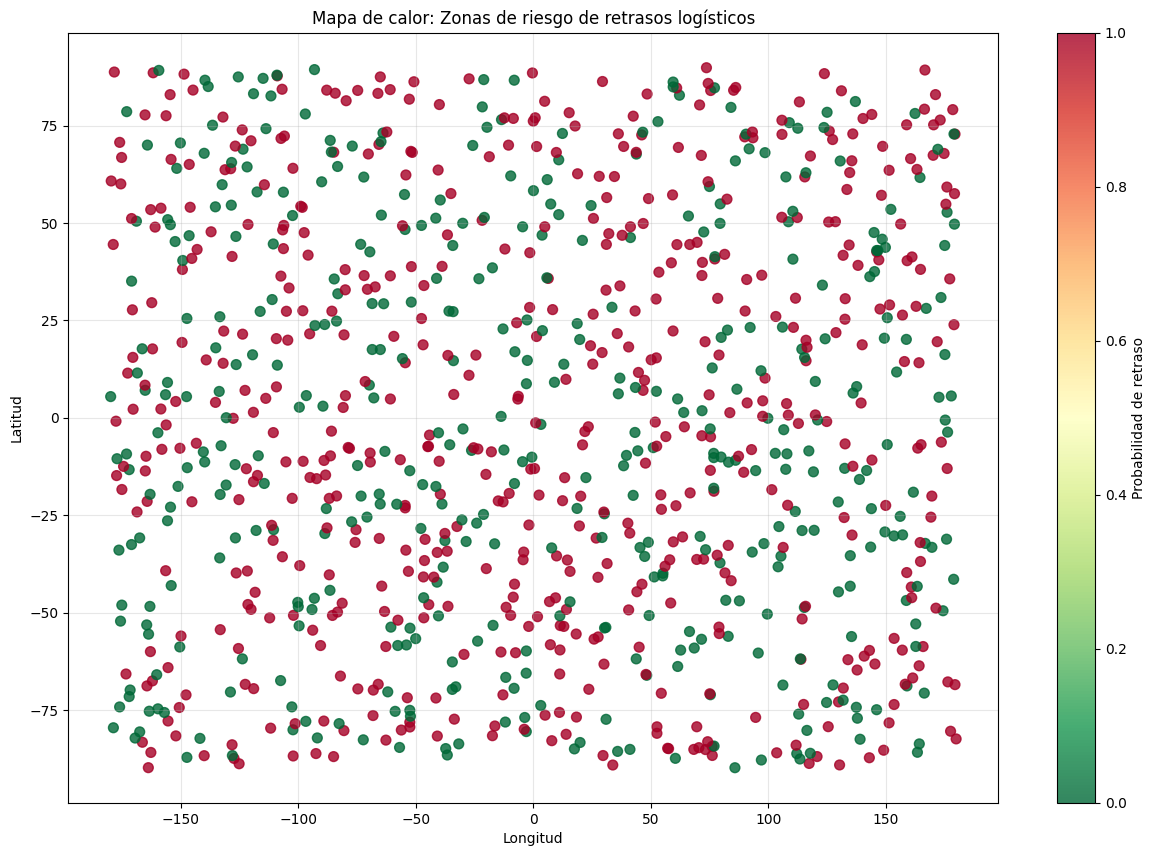

In [28]:
plt.figure(figsize=(15, 10))

# Scatter plot coloreado por probabilidad de retraso
scatter = plt.scatter(location_risk['Longitude'], location_risk['Latitude'],
                     c=location_risk['delay_probability'],
                     cmap='RdYlGn_r',  # Rojo (alto riesgo) a Verde (bajo riesgo)
                     s=50, alpha=0.8)

plt.colorbar(scatter, label='Probabilidad de retraso')
plt.title('Mapa de calor: Zonas de riesgo de retrasos logísticos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(alpha=0.3)
plt.show()

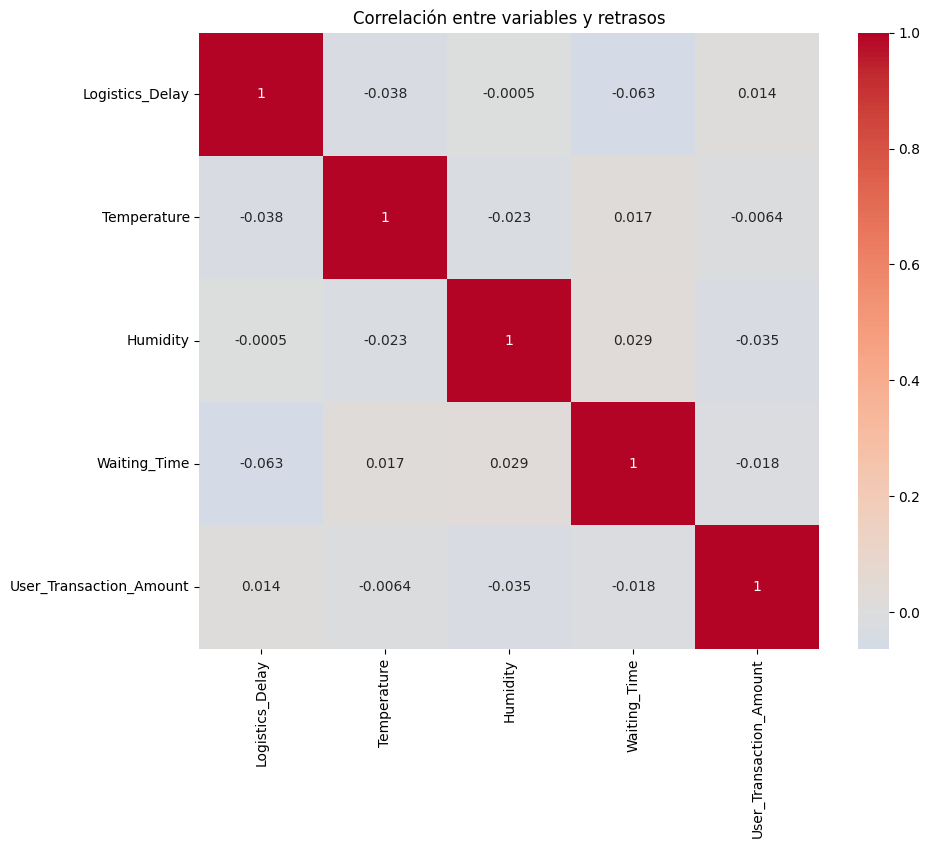


Probabilidad de retraso por tipo de tráfico:
                delay_probability  total_shipments
Traffic_Status                                    
Heavy                     1.00000              327
Detour                    0.35942              345
Clear                     0.35061              328


In [31]:
# Factores correlacionados con retrasos
correlation_matrix = df_logistics[['Logistics_Delay', 'Temperature', 'Humidity',
                        'Waiting_Time', 'User_Transaction_Amount']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre variables y retrasos')
plt.show()

# Análisis de retrasos por tipo de tráfico
traffic_delay_analysis = df_logistics.groupby('Traffic_Status')['Logistics_Delay'].agg(['mean', 'count'])
traffic_delay_analysis.columns = ['delay_probability', 'total_shipments']
traffic_delay_analysis = traffic_delay_analysis.sort_values('delay_probability', ascending=False)

print("\nProbabilidad de retraso por tipo de tráfico:")
print(traffic_delay_analysis)

In [32]:
# 1. Probabilidad marginal de cada estado de tráfico
traffic_distribution = df_logistics['Traffic_Status'].value_counts(normalize=True).round(3) * 100
print("Distribución de estados de tráfico:")
print(traffic_distribution)
print("\n" + "="*50 + "\n")

# 2. Probabilidad condicional P(Retraso | Traffic_Status)
delay_by_traffic = df_logistics.groupby('Traffic_Status')['Logistics_Delay'].agg([
    'mean',  # Probabilidad de retraso
    'count'   # Total de envíos
]).round(3)

delay_by_traffic.columns = ['prob_retraso', 'total_envios']
delay_by_traffic['prob_retraso_pct'] = (delay_by_traffic['prob_retraso'] * 100).round(1)

print("Probabilidad de retraso por estado de tráfico:")
print(delay_by_traffic.sort_values('prob_retraso', ascending=False))
print("\n" + "="*50 + "\n")

# 3. Análisis estadístico más detallado
traffic_delay_detail = df_logistics.groupby('Traffic_Status').agg({
    'Logistics_Delay': ['mean', 'sum', 'count'],
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Waiting_Time': 'mean'
}).round(2)

traffic_delay_detail.columns = [
    'prob_retraso', 'total_retrasos', 'total_envios',
    'temp_promedio', 'humedad_promedio', 'tiempo_espera_promedio'
]

traffic_delay_detail['prob_retraso_pct'] = (traffic_delay_detail['prob_retraso'] * 100).round(1)
traffic_delay_detail = traffic_delay_detail.sort_values('prob_retraso', ascending=False)

print("Análisis detallado por estado de tráfico:")
print(traffic_delay_detail)


Distribución de estados de tráfico:
Traffic_Status
Detour    34.5
Clear     32.8
Heavy     32.7
Name: proportion, dtype: float64


Probabilidad de retraso por estado de tráfico:
                prob_retraso  total_envios  prob_retraso_pct
Traffic_Status                                              
Heavy                  1.000           327             100.0
Detour                 0.359           345              35.9
Clear                  0.351           328              35.1


Análisis detallado por estado de tráfico:
                prob_retraso  total_retrasos  total_envios  temp_promedio  \
Traffic_Status                                                              
Heavy                   1.00             327           327          23.87   
Detour                  0.36             124           345          23.99   
Clear                   0.35             115           328          23.81   

                humedad_promedio  tiempo_espera_promedio  prob_retraso_pct  
Traffic_St

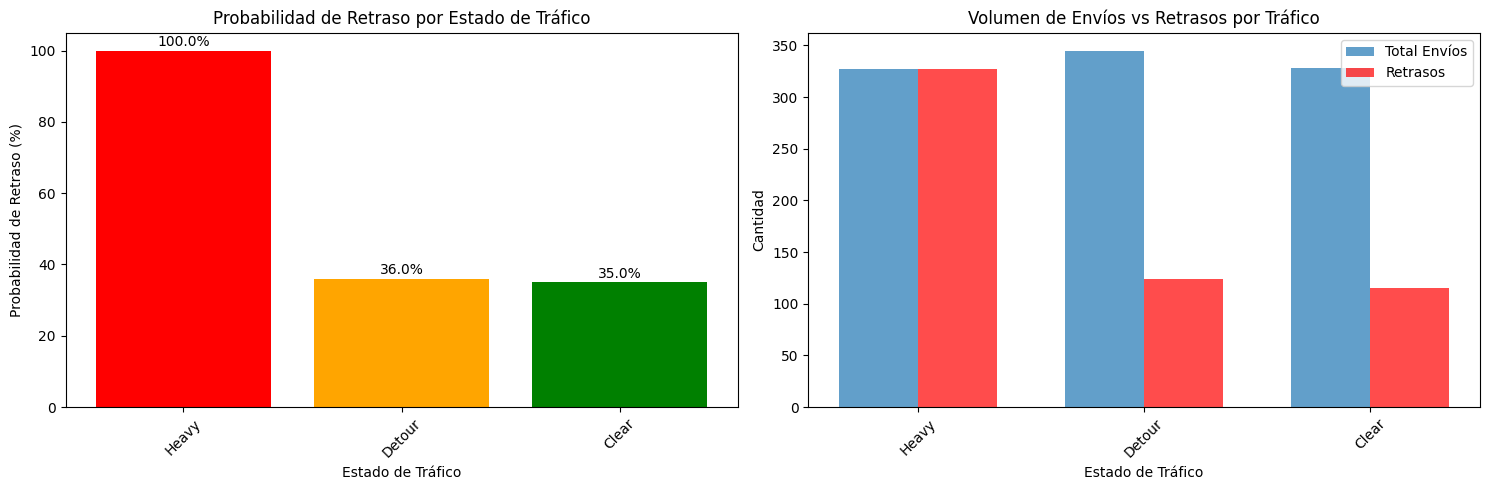

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
## Se concluye que si hay retras ocuand otrafico es alto
plt.figure(figsize=(15, 5))

# Gráfico 1: Probabilidad de retraso por estado de tráfico
plt.subplot(1, 2, 1)
bars = plt.bar(traffic_delay_detail.index, traffic_delay_detail['prob_retraso_pct'],
               color=['red', 'orange', 'green', 'blue'])
plt.title('Probabilidad de Retraso por Estado de Tráfico')
plt.xlabel('Estado de Tráfico')
plt.ylabel('Probabilidad de Retraso (%)')
plt.xticks(rotation=45)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}%', ha='center', va='bottom')

# Gráfico 2: Total de envíos vs retrasos por estado de tráfico
plt.subplot(1, 2, 2)
width = 0.35
x = range(len(traffic_delay_detail))
plt.bar(x, traffic_delay_detail['total_envios'], width, label='Total Envíos', alpha=0.7)
plt.bar([i + width for i in x], traffic_delay_detail['total_retrasos'], width,
        label='Retrasos', alpha=0.7, color='red')
plt.title('Volumen de Envíos vs Retrasos por Tráfico')
plt.xlabel('Estado de Tráfico')
plt.ylabel('Cantidad')
plt.xticks([i + width/2 for i in x], traffic_delay_detail.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

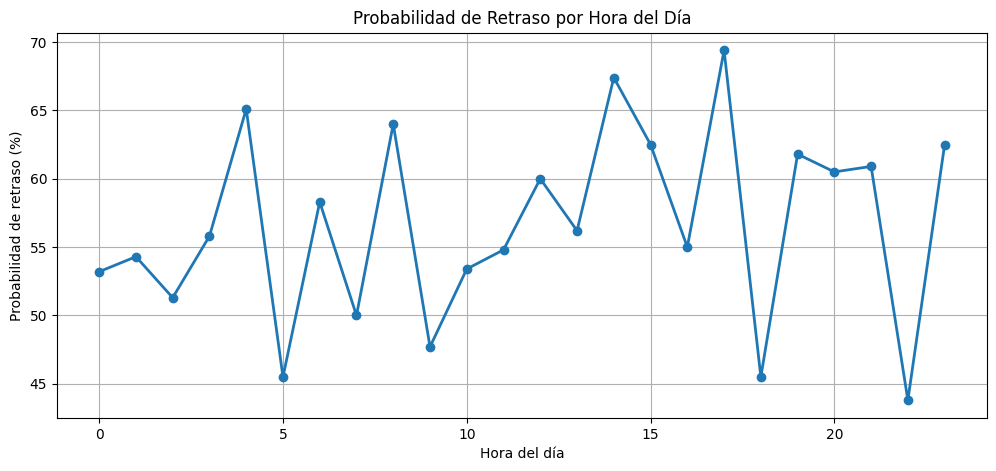

In [34]:
# Extraer hora del día
df_logistics['hour'] = pd.to_datetime(df_logistics['Timestamp']).dt.hour

# Retrasos por hora
delay_by_hour = df_logistics.groupby('hour')['Logistics_Delay'].agg(['mean', 'count']).round(3)
delay_by_hour['delay_rate_pct'] = (delay_by_hour['mean'] * 100).round(1)

plt.figure(figsize=(12, 5))
plt.plot(delay_by_hour.index, delay_by_hour['delay_rate_pct'], marker='o', linewidth=2)
plt.title('Probabilidad de Retraso por Hora del Día')
plt.xlabel('Hora del día')
plt.ylabel('Probabilidad de retraso (%)')
plt.grid(True)
plt.show()

In [36]:
# ¿Los trucks muy utilizados tienen más retrasos?
## Parece que el aset utilizatio nno tieme impacto
utilization_delay = df_logistics.groupby(pd.qcut(df_logistics['Asset_Utilization'], 4))['Logistics_Delay'].mean().round(3)

print("Probabilidad de retraso por nivel de utilización:")
print(utilization_delay)

Probabilidad de retraso por nivel de utilización:
Asset_Utilization
(59.999, 69.475]    0.576
(69.475, 79.25]     0.580
(79.25, 89.425]     0.548
(89.425, 100.0]     0.560
Name: Logistics_Delay, dtype: float64


/tmp/ipython-input-527658687.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



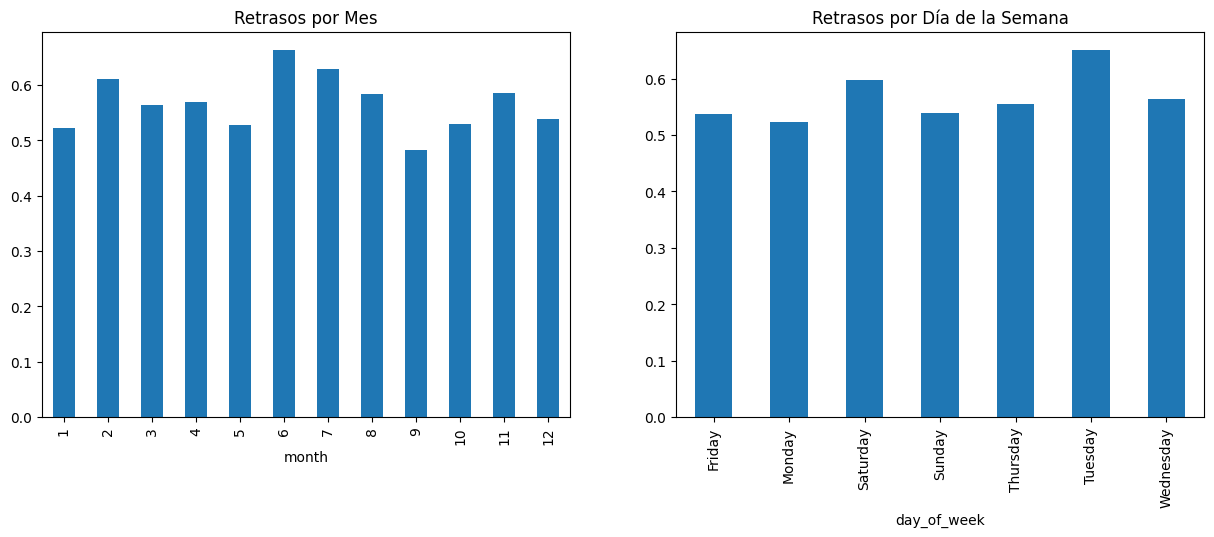

In [37]:
df_logistics['month'] = pd.to_datetime(df_logistics['Timestamp']).dt.month
df_logistics['day_of_week'] = pd.to_datetime(df_logistics['Timestamp']).dt.day_name()

delay_by_month = df_logistics.groupby('month')['Logistics_Delay'].mean()
delay_by_day = df_logistics.groupby('day_of_week')['Logistics_Delay'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
delay_by_month.plot(kind='bar', ax=ax1, title='Retrasos por Mes')
delay_by_day.plot(kind='bar', ax=ax2, title='Retrasos por Día de la Semana')
plt.show()

In [38]:
# Combinar ubicación con múltiples variables
geo_analysis = df_logistics.groupby(['Latitude', 'Longitude']).agg({
    'Logistics_Delay': 'mean',
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Traffic_Status': lambda x: x.mode()[0],
    'Waiting_Time': 'mean'
}).round(2).sort_values('Logistics_Delay', ascending=False)

print("Top 10 zonas de mayor riesgo con sus características:")
print(geo_analysis.head(10))

Top 10 zonas de mayor riesgo con sus características:
                    Logistics_Delay  Temperature  Humidity Traffic_Status  \
Latitude Longitude                                                          
 89.8701  73.6867               1.0         26.9      70.0          Heavy   
 89.2765  166.6548              1.0         18.9      55.5          Heavy   
-89.7784 -163.7965              1.0         28.3      76.2          Clear   
-89.0981  33.8294               1.0         18.6      77.9          Heavy   
-89.0793  130.3362              1.0         22.8      76.1         Detour   
-88.7760 -125.1628              1.0         21.5      51.0          Heavy   
 86.3368  29.4478               1.0         23.4      59.9         Detour   
 86.2679 -50.7895               1.0         28.0      67.2          Heavy   
 85.8393  74.4208               1.0         30.0      75.4          Heavy   
 84.8041  86.1533               1.0         20.6      79.3          Heavy   

                    W

In [39]:
# Dado que hay un retraso, ¿cuál es la probabilidad de que ocurra en cierto día de la semana o en cierto mes?
# 1. Extraer mes y día de la semana
df_logistics['Timestamp'] = pd.to_datetime(df_logistics['Timestamp'])
df_logistics['month'] = df_logistics['Timestamp'].dt.month
df_logistics['day_of_week'] = df_logistics['Timestamp'].dt.day_name()

# 2. Filtrar solo los retrasos
retrasos_df = df_logistics[df_logistics['Logistics_Delay'] == 1]

# 3. Probabilidad condicional: P(Día de la semana | Retraso)
prob_dia_retraso = (retrasos_df['day_of_week'].value_counts(normalize=True) * 100).round(2)
prob_dia_retraso = prob_dia_retraso.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("Dado que hay un retraso, probabilidad por día de la semana:")
print(prob_dia_retraso)
print("\n" + "="*50 + "\n")

# 4. Probabilidad condicional: P(Mes | Retraso)
prob_mes_retraso = (retrasos_df['month'].value_counts(normalize=True) * 100).round(2)
prob_mes_retraso = prob_mes_retraso.reindex(range(1, 13))

print("Dado que hay un retraso, probabilidad por mes:")
print(prob_mes_retraso)


Dado que hay un retraso, probabilidad por día de la semana:
day_of_week
Monday       14.13
Tuesday      16.08
Wednesday    15.72
Thursday     13.25
Friday       13.96
Saturday     14.66
Sunday       12.19
Name: proportion, dtype: float64


Dado que hay un retraso, probabilidad por mes:
month
1     8.48
2     8.30
3     9.36
4     8.66
5     6.89
6     9.01
7     9.54
8     7.95
9     7.07
10    7.77
11    8.48
12    8.48
Name: proportion, dtype: float64


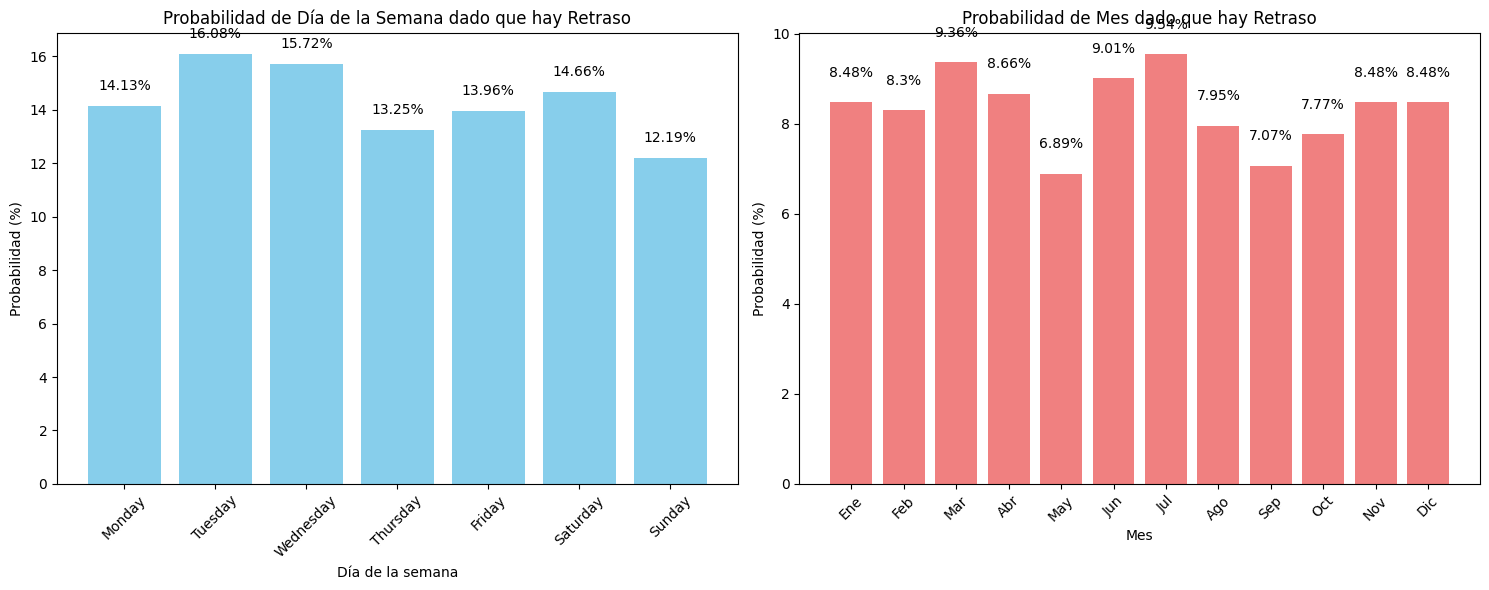

In [40]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Probabilidad por día de la semana
bars1 = ax1.bar(prob_dia_retraso.index, prob_dia_retraso.values, color='skyblue')
ax1.set_title('Probabilidad de Día de la Semana dado que hay Retraso')
ax1.set_xlabel('Día de la semana')
ax1.set_ylabel('Probabilidad (%)')
ax1.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}%', ha='center', va='bottom')

# Gráfico 2: Probabilidad por mes
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
prob_mes_retraso.index = meses[:len(prob_mes_retraso)]

bars2 = ax2.bar(prob_mes_retraso.index, prob_mes_retraso.values, color='lightcoral')
ax2.set_title('Probabilidad de Mes dado que hay Retraso')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Probabilidad (%)')
ax2.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Probabilidad conjunta: Mes y Día de la semana dado Retraso (%):
day_of_week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Ene            0.88     1.94       0.88      1.06    1.24      1.77    0.71
Feb            0.88     1.77       1.77      0.88    0.71      1.41    0.88
Mar            0.88     1.06       1.06      1.77    2.12      1.59    0.88
Abr            1.59     1.94       1.06      1.59    0.88      0.88    0.71
May            0.71     0.71       1.06      1.59    1.41      0.88    0.53
Jun            1.41     1.59       0.88      0.71    1.24      1.94    1.24
Jul            1.41     1.94       1.77      1.06    1.24      1.24    0.88
Ago            1.24     1.59       1.24      0.88    1.24      0.88    0.88
Sep            1.24     0.53       1.06      1.77    1.06      0.35    1.06
Oct            0.88     1.41       2.30      0.71    1.06      0.53    0.88
Nov            1.06     1.06       1.59      0.35    1.24      1.94    1.24
Dic            1.94     

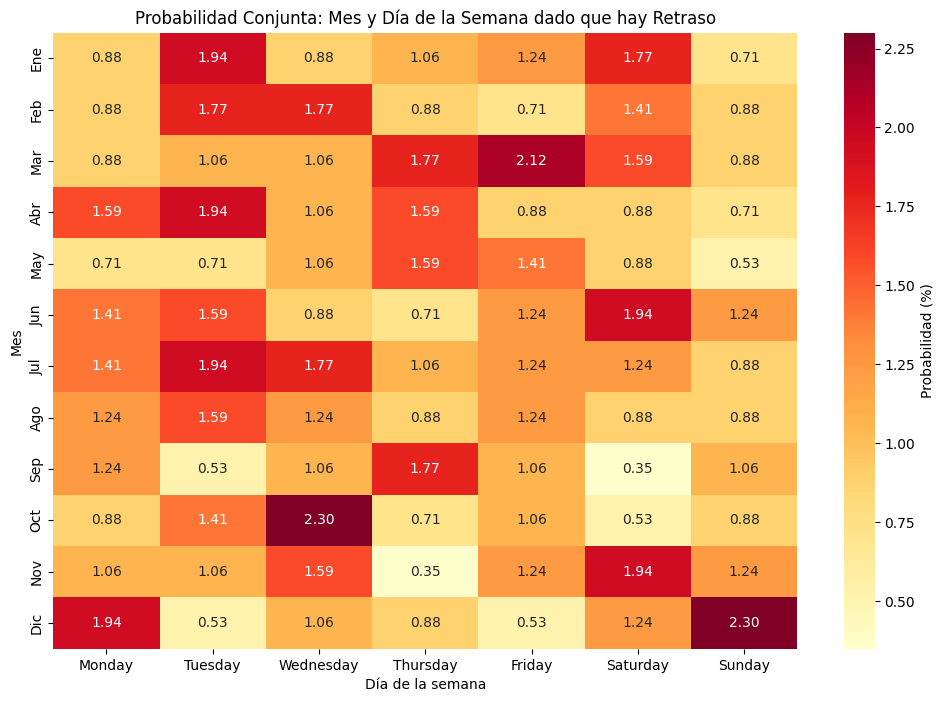

In [41]:
# Probabilidad conjunta: P(Mes y Día de la semana | Retraso)
prob_mes_dia = pd.crosstab(
    index=retrasos_df['month'],
    columns=retrasos_df['day_of_week'],
    normalize=True
).round(4) * 100

# Reordenar columnas y filas
prob_mes_dia = prob_mes_dia.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
prob_mes_dia.index = meses[:len(prob_mes_dia)]

print("Probabilidad conjunta: Mes y Día de la semana dado Retraso (%):")
print(prob_mes_dia)

# Heatmap de probabilidades conjuntas
plt.figure(figsize=(12, 8))
sns.heatmap(prob_mes_dia, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Probabilidad (%)'})
plt.title('Probabilidad Conjunta: Mes y Día de la Semana dado que hay Retraso')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.show()